In [215]:

import pandas as pd

from sklearn.linear_model import LogisticRegression

import numpy as np

from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [216]:
train = pd.read_csv ("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv ("gender_submission.csv")


In [217]:
train['Sex_binary'] = train.Sex.map({"male": 0, "female": 1}) 
test_df['Sex_binary'] = test_df.Sex.map({"male": 0, "female": 1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [218]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [219]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_binary
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


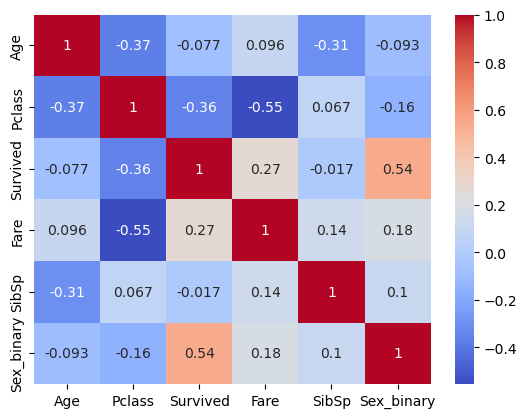

In [220]:
# seaborn offers customizable visualizations
import seaborn as sns
# this allows you to plot charts 
import matplotlib.pyplot as plt


# Select three variables of interest, for example, 'Age', 'Fare', and 'Pclass'.
# Replace these with your variables of interest if they are different. 
selected_variables = train[['Age','Pclass', 'Survived', 'Fare','SibSp','Sex_binary']] #inner list, outer brackets are how I reference columns in train

# Drop rows with missing values to ensure proper correlation calculation
selected_variables = selected_variables.dropna()

# Calculate the correlation matrix
corr_matrix = selected_variables.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# The below shows the correlation highest positive correlation

In [221]:

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [222]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [223]:
#Used pandas:Took and mergeed PassengerID and on two different CSVs(gernder_Sub & Test) Think Inner Join SQL
test = pd.merge(test_df, gender_submission, on = "PassengerId", how="inner")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1


In [224]:
# Created binary representation for Pclass
train['FirstClass'] = train.Pclass.apply(lambda p: 1 if p == 1 else 0)
test['FirstClass'] = test.Pclass.apply(lambda p: 1 if p == 1 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [225]:
# Created binary representation for 2nd Pclass
train['SecondClass'] = train.Pclass.apply( lambda p: 1 if p == 2 else 0)
test['SecondClass'] = test.Pclass.apply( lambda p: 1 if p == 2 else 0)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,1


In [226]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,FirstClass,SecondClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,0,0


In [227]:
# Created binary representation for 2nd Pclass
train['ThirdClass'] = train.Pclass.apply( lambda p: 1 if p == 3 else 0)
test['ThirdClass'] = test.Pclass.apply( lambda p: 1 if p == 3 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [228]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Survived,FirstClass,SecondClass,ThirdClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,0,0,1


In [229]:
# train['Sex_binary'] = train.Sex.map({"male": 0, "female": 1}) 
# test['Sex_binary'] = test.Sex.map({"male": 0, "female": 1})
# test['Sex_binary'] = test.Sex.map({"male": 0, "female": 1})
# train.head()

In [230]:
#Let's fill in the ages with the mean of all ages.
train['Age'].fillna(value = round(train['Age'].mean()), inplace = True) #look up .fillna function
test['Age'].fillna(value = round(test['Age'].mean()), inplace = True) 
train["Age"].count() #now we have every row accounted for.

891

In [231]:
#I want to focus on training a model on Age, Sex_binary, FirstClass, SecondClass, ThirdClass, "SibSp", "Parch", "Fare"
#The goal is to predict whether or not the user survived based on this. 
train_features = train[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]] #survived = x1 + x2 + x3 + x4 + x5 + x6
train_labels = train["Survived"] # what were trying to find.
test_features = test[["Age", "Sex_binary", "FirstClass", "SecondClass", "ThirdClass"]]
test_labels = test["Survived"]


In [232]:
scaler = StandardScaler()## normalizes data so its on all the same scale. .95 rounded up, .33 rounded down. Z score normalization
train_features_norm = scaler.fit_transform(train_features)
test_features_norm = scaler.transform(test_features)


# Logistic Regression


In [233]:
#import the model
from sklearn.linear_model import LogisticRegression


In [234]:
#initialize the model ** Calling the function, and the function name is just a math problem. If I had 3 models that I wanted to run Lg regression I would name the variable lr_model1, lr_model2 etc. 
lr_model = LogisticRegression()


In [235]:
# Train the model / fit the model ** Same thing
lr_model.fit(train_features_norm, train_labels)

LogisticRegression()

In [236]:
# Score the model... Important to do this right!!
from sklearn.metrics import accuracy_score # Already imported at the top, but important for process memorization

y_predict = lr_model.predict(test_features_norm) # Taking the test data to predict if those people are going to survive or not. 

log_model_accuracy_score = accuracy_score(test_labels,y_predict) # Take what I have in Y predict and compare against the actual answers which are the test labels. 

print(f'accuracy = {log_model_accuracy_score}') # does math to create accuracy score of the log model. Facts vs predictions

accuracy = 0.9641148325358851


In [237]:
y_predict # prints Y prediction. 

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [238]:
test_labels # look at the top results and verify with the below results. ** Across above, down below in second column. 

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [239]:
Jack = np.array([20.0, 0.0, 0.0, 0.0, 1.0]) # Added ficticious data to np array to predict 
Rose = np.array([17.0, 1.0, 1.0, 0.0, 0.0])
GoyaBean= np.array([34.0, 0.0, 0.0, 1.0, 0.0])

In [240]:
predict_pass = np.array([Jack, Rose, GoyaBean])# made numpy array with the data from up above. Packaging variables to run through Scaler.Transform
predict_pass = scaler.transform(predict_pass)# Taking same array and transforming it so the data above is all on the same scale. 

c:\Users\julio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [241]:
print(lr_model.predict(predict_pass)) 
print(lr_model.predict_proba(predict_pass))

[0 1 0]
[[0.88542238 0.11457762]
 [0.05002647 0.94997353]
 [0.78745818 0.21254182]]


# Steps:
### 1.Import, 2.Intialize, 3.Train, 4.Make Predictions, 5.Evaluate, 6.Analyze, 7. Predict, 8. Interpret

# Lets Import models : Decision Tree and Random Forest

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Init The Models

In [243]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
RFC_model = RandomForestClassifier(n_estimators=90, criterion= "gini", max_depth=5)


# Train Model

In [244]:
tree_model.fit(train_features_norm, train_labels)
RFC_model.fit(train_features_norm, train_labels)

RandomForestClassifier(max_depth=5, n_estimators=90)

# Predictions

In [245]:
tree_predictions = tree_model.predict(test_features_norm)
rfc_predictions = RFC_model.predict(test_features_norm)

# Evaluate Models

In [246]:
tree_accuracy = accuracy_score(test_labels, tree_predictions)
rfc_accuracy = accuracy_score(test_labels, rfc_predictions)

print('Decision tree accuracy:', tree_accuracy)
print('Random Forest accuracy:', rfc_accuracy)



Decision tree accuracy: 0.9569377990430622
Random Forest accuracy: 0.9569377990430622


# Predict 
### Define new data samples

In [247]:
Jack = np.array([20.0, 0.0, 0.0, 0.0, 1.0])
Rose = np.array([17.0, 1.0, 1.0, 0.0, 0.0])
GoyaBean = np.array([34.0, 0.0, 0.0, 1.0, 0.0])
predict_pass = np.array([Jack, Rose, GoyaBean])


### Normalize new data Samples

In [248]:
predict_pass_norm = scaler.transform(predict_pass)

c:\Users\julio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [249]:
# Predict with Decision Tree
new_tree_predictions = tree_model.predict(predict_pass_norm)

# Predict with Random Forest
new_rfc_predictions = RFC_model.predict(predict_pass_norm)

print('New data predictions with Decision Tree:', new_tree_predictions)
print('New data predictions with Random Forest:', new_rfc_predictions)


New data predictions with Decision Tree: [0 1 0]
New data predictions with Random Forest: [0 1 0]
